In [1]:
import warnings
import pandas as pd
import numpy as np
import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [2]:
#Use the OpenBB SDK to pull closing price data for the past 10 years
start = '2013-02-13'
end = '2023-02-13'

symbols = ["SPY", "COST", "AVGO", "APD", "AMGN", "CVX", "AAPL", "DIS",
          "BAC", "GS", "SBUX", "COF", "ETN", "XOM", "HD", "MA",
          "QQQ", "IWM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NVDA", "NKE",
          "PEP", "PFE", "PG", "MO", "BUD", "SHW", "TSCO", "UNH", "VZ", "V", "WMT"]

data = openbb.economy.index(symbols, start_date=start, end_date=end)
data

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-13 00:00:00-05:00,126.366096,83.569176,26.767309,64.430954,65.351990,76.319023,14.405275,49.963741,10.341107,130.554382,...,17.901682,57.207512,19.707796,68.738297,50.024689,45.482613,49.074036,28.145346,36.090054,57.176163
2013-02-14 00:00:00-05:00,126.482422,83.889847,27.125029,64.365631,65.182739,76.437920,14.392325,49.891018,10.307118,131.745682,...,17.941467,57.371895,19.328146,72.242966,49.486477,45.769371,48.919678,28.025227,36.372200,56.719654
2013-02-15 00:00:00-05:00,126.332916,84.013191,26.744490,64.031792,64.328720,75.942490,14.193986,50.554653,10.222147,130.951431,...,18.093962,57.192585,19.481144,72.219604,50.402626,45.778194,49.151211,28.069473,36.840912,55.502270
2013-02-19 00:00:00-05:00,127.279716,83.791161,27.048920,64.372879,64.728813,76.576660,14.188740,50.663750,10.358101,134.043732,...,18.372425,57.820229,19.702135,72.499977,49.616489,45.632610,48.585258,28.132706,36.752300,55.069794
2013-02-20 00:00:00-05:00,125.693375,83.116890,26.386774,63.581837,65.128876,75.962296,13.845117,49.636467,10.026708,131.112000,...,18.279610,57.596077,19.770134,72.328636,48.174252,44.803253,47.341892,28.398218,36.241627,55.430195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,409.829987,515.590027,601.299988,283.029999,241.718353,168.153488,151.498688,109.870003,36.369999,370.799988,...,43.759998,141.399994,46.959999,58.730000,243.029999,232.419998,475.239990,41.279999,228.991501,140.679993
2023-02-07 00:00:00-05:00,415.190002,516.530029,614.450012,285.070007,241.867035,172.564484,154.414230,111.629997,36.770000,374.399994,...,43.590000,140.020004,46.560001,58.419998,238.440002,232.729996,476.880005,40.549999,230.867828,140.979996
2023-02-08 00:00:00-05:00,410.649994,503.809998,601.710022,287.239990,238.100250,168.510330,151.688400,111.779999,36.500000,375.100006,...,43.980000,138.570007,46.500000,58.200001,235.509995,231.240005,483.220001,40.520000,229.750000,140.220001


In [3]:
#Calc the daily returns using the .pct_change function
returns = data.pct_change().dropna()
returns

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-14 00:00:00-05:00,0.000921,0.003837,0.013364,-0.001014,-0.002590,0.001558,-0.000899,-0.001456,-0.003287,0.009125,...,0.002222,0.002873,-0.019264,0.050986,-0.010759,0.006305,-0.003145,-0.004268,0.007818,-0.007984
2013-02-15 00:00:00-05:00,-0.001182,0.001470,-0.014029,-0.005187,-0.013102,-0.006481,-0.013781,0.013302,-0.008244,-0.006029,...,0.008500,-0.003125,0.007916,-0.000323,0.018513,0.000193,0.004733,0.001579,0.012887,-0.021463
2013-02-19 00:00:00-05:00,0.007494,-0.002643,0.011383,0.005327,0.006220,0.008351,-0.000370,0.002158,0.013300,0.023614,...,0.015390,0.010974,0.011344,0.003882,-0.015597,-0.003180,-0.011515,0.002253,-0.002405,-0.007792
2013-02-20 00:00:00-05:00,-0.012463,-0.008047,-0.024480,-0.012288,0.006181,-0.008023,-0.024218,-0.020276,-0.031994,-0.021871,...,-0.005052,-0.003877,0.003451,-0.002363,-0.029068,-0.018175,-0.025591,0.009438,-0.013895,0.006544
2013-02-21 00:00:00-05:00,-0.006079,-0.003858,-0.028843,-0.022143,0.005670,0.000000,-0.006216,-0.007876,-0.032203,-0.027710,...,-0.005803,-0.000519,0.008885,-0.008722,-0.018384,-0.004637,0.000544,0.004453,0.012997,0.015171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,-0.006111,0.001535,0.006158,-0.006982,-0.005384,0.001121,-0.017929,-0.007587,-0.001647,0.002298,...,-0.006809,-0.008485,0.001066,-0.007772,0.005378,0.016888,0.006822,-0.005541,-0.002998,-0.007268
2023-02-07 00:00:00-05:00,0.013079,0.001823,0.021869,0.007208,0.000615,0.026232,0.019245,0.016019,0.010998,0.009709,...,-0.003885,-0.009759,-0.008518,-0.005278,-0.018887,0.001334,0.003451,-0.017684,0.008194,0.002133
2023-02-08 00:00:00-05:00,-0.010935,-0.024626,-0.020734,0.007612,-0.015574,-0.023494,-0.017653,0.001344,-0.007343,0.001870,...,0.008947,-0.010356,-0.001289,-0.003766,-0.012288,-0.006402,0.013295,-0.000740,-0.004842,-0.005391


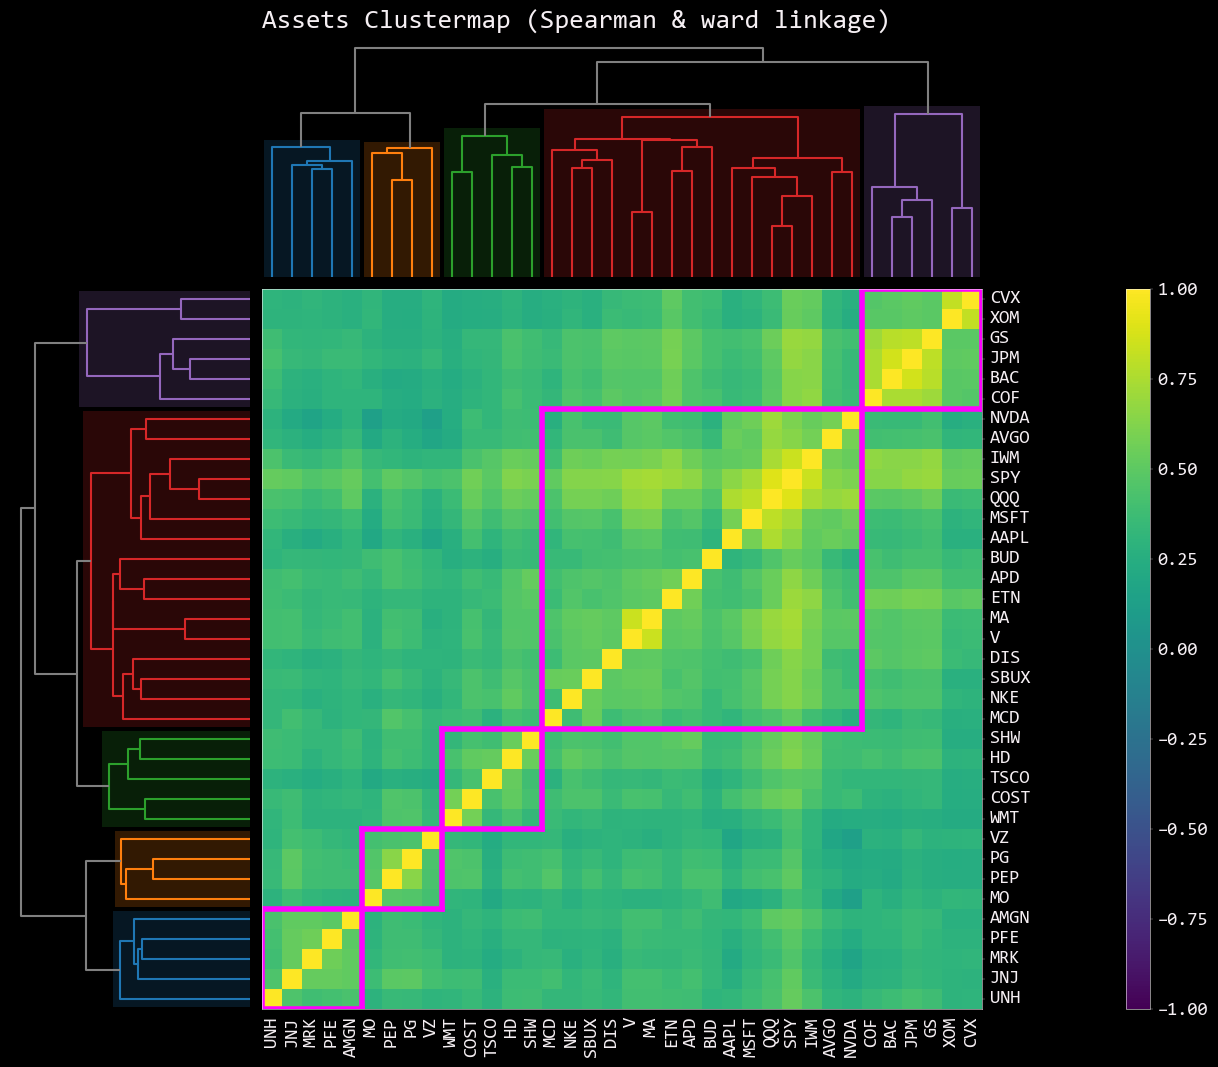

In [4]:
# Use riskfolio library to analyze the clustering and linkage of stocks used in portfolio
ax = rp.plot_clusters(returns=returns, codependence='spearman',
                      linkage='ward', k=None, max_k=10,
                      leaf_order=True, dendrogram=True, ax=None)